# Introduction

LEGO is a toy manufacturer and global phenomen established in Dennemark. Compaany flagship products are interlocking, plastic bricks sold all over the world. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

<img src="https://i.imgur.com/49FNOHj.jpg">

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors_df = pd.read_csv('colors.csv')
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


# Data Exploration

### How many different colours does the LEGO company produce? 

In [4]:
colors_df.isnull().sum()

id          0
name        0
rgb         0
is_trans    0
dtype: int64

In [5]:
print(f'Number of different colors: {colors_df.name.nunique()}')

Number of different colors: 135


In [6]:
# Finding transparent values
colors_df['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

### LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png"> 

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png ">  

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

In [7]:
sets_df = pd.read_csv('sets.csv')
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [8]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [9]:
sets_df.shape

(15710, 5)

### In which year were the first LEGO sets released and what were these sets called?

In [10]:
sets_df.sort_values('year')

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
...,...,...,...,...,...
11289,75290-1,Mos Eisley Cantina,2020,158,0
5147,41430-1,Summer Fun Water Park,2020,494,1012
11337,75550-1,Minions Kung Fu Battle,2021,689,0
11335,75547-1,Minion Pilot in Training,2021,689,0


### How many different sets did LEGO sell in their first year?

In [11]:
print(f"Number of set released in first year of LEGO: {sets_df[sets_df.year == 1949]['name'].count()}")

Number of set released in first year of LEGO: 5


### Top 5 LEGO sets with the most number of parts. 

In [12]:
sets_df.sort_values('num_parts', ascending=False).head(5)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [13]:
sets_by_year = sets_df.groupby('year')['set_num'].count()
sets_by_year

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64

### Number of LEGO releases year-on-year

In [14]:
sets_by_year = sets_by_year[sets_by_year.index != 2021]
sets_by_year

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2016    757
2017    786
2018    816
2019    840
2020    674
Name: set_num, Length: 70, dtype: int64

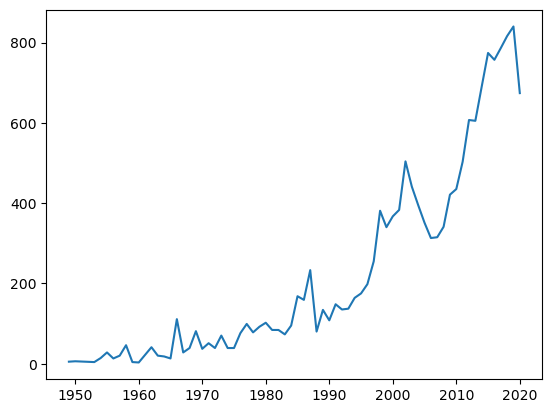

In [15]:
plt.plot(sets_by_year)

### Number of different themes shipped by year

Text(0.5, 1.0, 'Number of Lego themes 1949-2019')

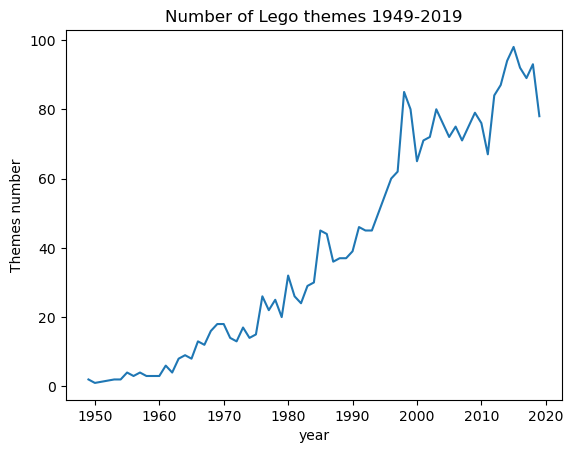

In [16]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})
#plot themes by year 1949-2019
plt.plot(themes_by_year[:-2])
plt.xlabel('year')
plt.ylabel('Themes number')
plt.title('Number of Lego themes 1949-2019')

### LEGO Sets vs Themes over past decades

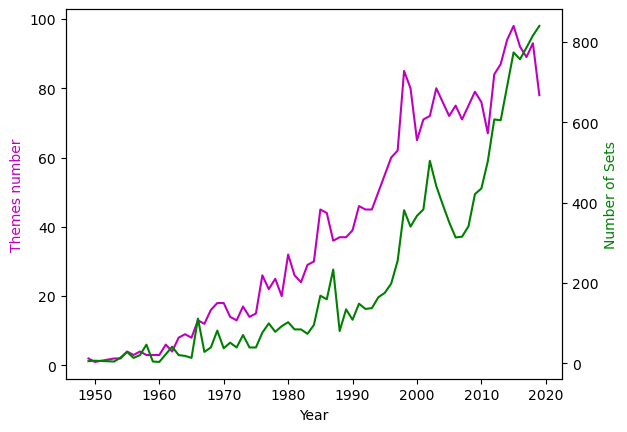

In [17]:
fig, ax1 = plt.subplots()
ax1.plot(themes_by_year[:-2], color='m')
ax1.set_xlabel('Year')
ax1.set_ylabel('Themes number', color='m')

ax2= ax1.twinx()

ax2.plot(sets_by_year[:-1], color='green')
ax2.set_ylabel('Number of Sets', color='green')

plt.show()

In [18]:
parts_per_set = sets_df.groupby('year')['num_parts'].mean()
parts_per_set.loc[[1954,2017]]

year
1954     12.357143
2017    221.840967
Name: num_parts, dtype: float64

### Has the size and complexity of LEGO sets increased over time based on the number of parts? 

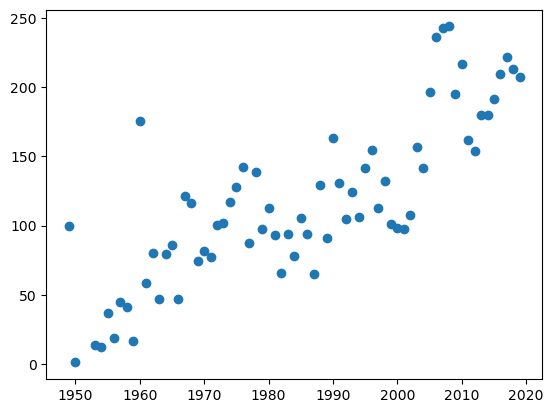

In [19]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.values[:-2])

### What themes are most popular in Lego history?

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [20]:
sets_df.value_counts('theme_id')

theme_id
158    753
501    656
494    398
435    356
503    329
      ... 
212      1
210      1
200      1
509      1
368      1
Length: 571, dtype: int64

In [21]:
#Themes dataset import
themes_df = pd.read_csv('themes.csv')
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [22]:
#Merging sets table with table containing theme names
merged = pd.merge(sets_df, themes_df, left_on='theme_id', right_on='id')
merged.columns = merged.columns.str.replace('name_y', 'theme_name')
merged.head()

,set_num,name_x,year,theme_id,num_parts,id,theme_name,parent_id
0,001-1,Gears,1965,1,43,1,Technic,NaN
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,1,Technic,NaN
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,191,1,Technic,NaN
3,1038-1,ERBIE the Robo-Car,1985,1,120,1,Technic,NaN
4,1039-1,Manual Control Set 1,1986,1,39,1,Technic,NaN


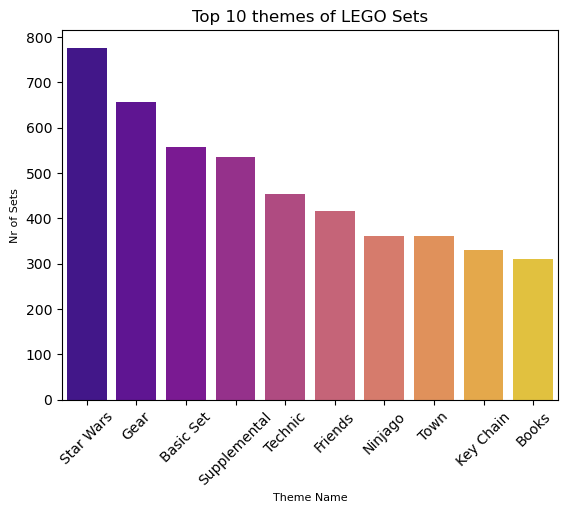

In [169]:
# Bar chart of 10 most popular themes in Lego history measured by number of issued sets
top_ten_themes = merged.value_counts('theme_name')[:10]
barchart = sns.barplot(x=top_ten_themes.index,y=top_ten_themes.values, palette='plasma')
plt.xticks(rotation=45)
plt.title('Top 10 themes of LEGO Sets')
plt.ylabel('Nr of Sets', fontsize=8)
plt.xlabel('Theme Name', fontsize=8)
plt.show()